## Importing Libraries
### Firstly import all the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
 
sns.set(style="white", color_codes=True)
import warnings

warnings.filterwarnings("ignore")

## Importing Dataset
### Loading the dataset, returning the number of missing values in the data set and replacing it with mean.

## a. Remove any null values by the mean.

In [4]:
dataset = pd.read_csv('credit card.csv')
print("-------------------Initial data set-------------------\n")
print(dataset.isnull().sum())

dataset["MINIMUM_PAYMENTS"].fillna(dataset["MINIMUM_PAYMENTS"].mean(), inplace = True)
dataset["CREDIT_LIMIT"].fillna(dataset["CREDIT_LIMIT"].mean(),inplace = True)

print("-------------------null values are replaced-------------------")
print(dataset.isnull().sum())

-------------------Initial data set-------------------

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64
-------------------null values are replaced-------------------
CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                         

In [12]:
dataset.drop('CUST_ID', axis = 1, inplace = True)

In [27]:
# Assigning x with feature set and y with target feature

x = dataset.iloc[:, 1:17]
y = dataset.iloc[:, -1]
print(x.shape, y.shape)

(8950, 16) (8950,)


12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64


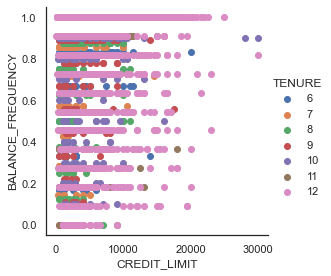

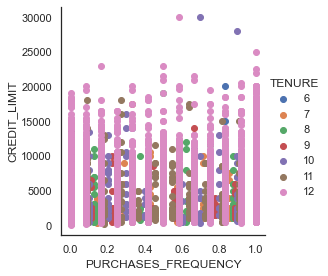

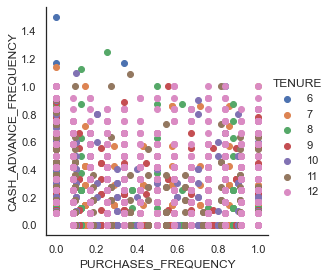

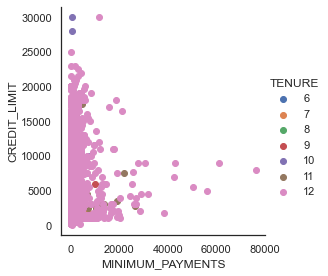

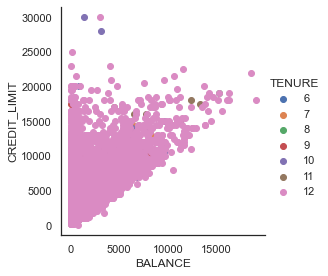

In [28]:
# Grouping the tenure with it's values
print(dataset["TENURE"].value_counts())

# Cluster identification
sns.FacetGrid(dataset, hue="TENURE", size=4).map(plt.scatter, "CREDIT_LIMIT", "BALANCE_FREQUENCY").add_legend()

sns.FacetGrid(dataset, hue="TENURE", size=4).map(plt.scatter, "PURCHASES_FREQUENCY", "CREDIT_LIMIT").add_legend()

sns.FacetGrid(dataset, hue="TENURE", size=4).map(plt.scatter, "PURCHASES_FREQUENCY", "CASH_ADVANCE_FREQUENCY").add_legend()

sns.FacetGrid(dataset, hue="TENURE", size=4).map(plt.scatter, "MINIMUM_PAYMENTS", "CREDIT_LIMIT").add_legend()

sns.FacetGrid(dataset, hue="TENURE", size=4).map(plt.scatter, "BALANCE", "CREDIT_LIMIT").add_legend()

plt.show()

## b. Use the elbow method to find a good number of clusters with the K-Means algorithm

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(dataset)

Text(0.5, 1.0, 'Elbow Curve')

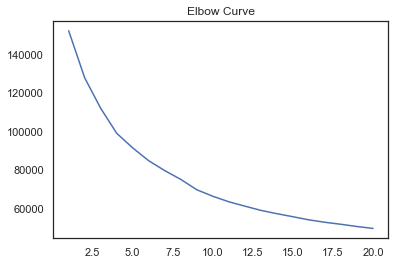

In [22]:
# The Sum of Squared Distance between Centroids (SSE) becomes flat at around 8 clusters. 
# We will be taking 8 clusters initially and run k-means.

n_clusters=20
sse=[]
for i in range(1,n_clusters+1):
    kmean= KMeans(i)
    kmean.fit(creditcard_df_scaled)
    sse.append([i, kmean.inertia_])
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1])
plt.title("Elbow Curve")

In [30]:
kmean= KMeans(8)
kmean.fit(creditcard_df_scaled)
y_kmeans = kmean.predict(data_model_std)
data_model['Cluster']       = y_kmeans
creditcard_df_scaled              = pd.DataFrame(creditcard_df_scaled)
creditcard_df_scaled['Cluster']   = y_kmeans

NameError: name 'data_model_std' is not defined

## c. Calculate the silhouette score for the above clustering.

In [29]:
# predict the cluster for each data point

y_cluster_kmeans = km.predict(x)
score = metrics.silhouette_score(x, y_cluster_kmeans)
print(score)

0.6413911195122755


## d. Try feature scaling and then apply K-Means on the scaled features. Did that improve the Silhouette score?

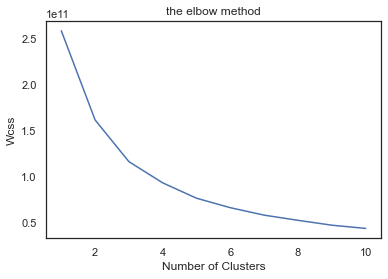

In [24]:
# Within Cluster Sum of Squares
wcss = []
# Elbow method to know the number of clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,max_iter=300,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

--------------------------------------------------
TENURE               1.000000
CREDIT_LIMIT         0.139034
PURCHASES_TRX        0.121874
BALANCE_FREQUENCY    0.119776
PAYMENTS             0.106136
PURCHASES            0.086288
Name: TENURE, dtype: float64
--------------------------------------------------


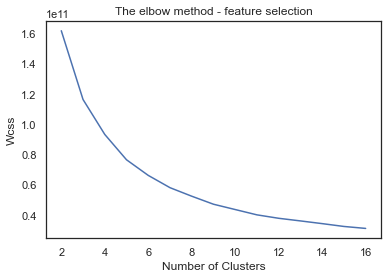

In [23]:
# Finding the top 5 most correlated columns to the target variable
corr = dataset.corr()
print("--------------------------------------------------")
print(corr['TENURE'].sort_values(ascending=False)[:6])
print("--------------------------------------------------")

# Eliminating the null values
data = dataset.select_dtypes(include=[np.number]).interpolate().dropna()

# assigning data columns selected from correlation value
x = data.iloc[:, [2, 3, -4, -5, -6]]
y = data.iloc[:, -1]

#  Elbow method to know the number of clusters
wcss = []
for i in range(2, 17):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 17), wcss)
plt.title('The elbow method - feature selection')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()